In [1]:
import torch as th
from gan_experiments import models_definition, gan_utils, multiband_training, BigGAN
from torchvision.utils import make_grid
from matplotlib import pyplot as plt
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "2"


In [2]:
model = __import__("BigGAN")


In [3]:
generator = th.load(
    "/home/bcywinski/multiband_gan/results/CIFAR100/CI_20_class_cond_only_gen/model19_curr_global_generator"
)
generator.eval()


Generator(
  (translator): Translator(
    (fc): Sequential(
      (0): Linear(in_features=200, out_features=400, bias=True)
      (1): LeakyReLU(negative_slope=0.2)
      (2): Linear(in_features=400, out_features=100, bias=True)
    )
    (task_embedding): Embedding(100, 100)
  )
  (l1): Linear(in_features=100, out_features=1024, bias=True)
  (conv_blocks): Sequential(
    (0): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): ConvTranspose2d(256, 1024, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (2): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU(inplace=True)
    (4): ConvTranspose2d(1024, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (5): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    

In [10]:
# labels = th.randint(2, 3, size=(16,)).to("cuda")
labels = th.cat([th.full(size=(4,), fill_value=i) for i in range(100)]).to("cuda")


In [11]:
generator.to("cuda")


Generator(
  (translator): Translator(
    (fc): Sequential(
      (0): Linear(in_features=200, out_features=400, bias=True)
      (1): LeakyReLU(negative_slope=0.2)
      (2): Linear(in_features=400, out_features=100, bias=True)
    )
    (task_embedding): Embedding(100, 100)
  )
  (l1): Linear(in_features=100, out_features=1024, bias=True)
  (conv_blocks): Sequential(
    (0): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): ConvTranspose2d(256, 1024, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (2): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU(inplace=True)
    (4): ConvTranspose2d(1024, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (5): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    

In [12]:
# generations = generator(
#     th.randn(len(labels), generator.latent_dim).to("cuda"),
#     generator.shared(labels.long()),
# )
generations = generator(
    th.randn(len(labels), generator.latent_dim).to("cuda"),
    labels.long(),
)


In [13]:
generations.shape


torch.Size([400, 3, 32, 32])

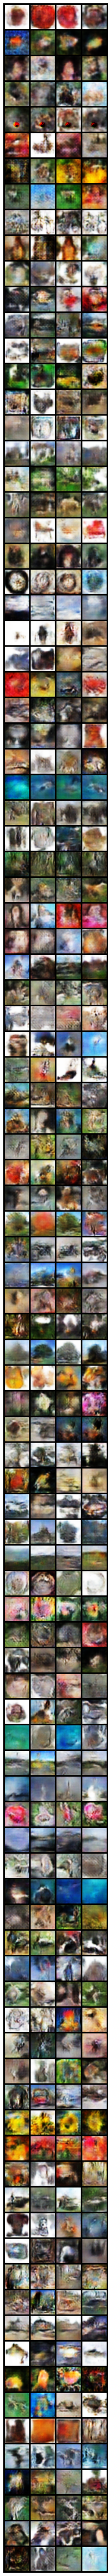

In [14]:
plt.figure(figsize=(20, 100))
grid = make_grid(generations.cpu(), normalize=True, nrow=4).permute(1, 2, 0)
plt.imshow(grid)
plt.axis("off")
plt.show()
